# On the Importance of Scaling with Stochastic Gradient Descent

This notebook demonstrates the importance of scaling input data when using stochastic gradient descent (SGD).

## Imports

Import necessary libraries here.

In [1]:
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

## Consider Data with Zero Error

Consider a dataset that can be predicted perfectly by a straight line. Here, we can create this artificially by specifying 100 samples and the target value `y` being 5 times whatever `x` is.

In [2]:
num_samples = 100
multiple = 5

In [3]:
y = np.array([i*multiple for i in range(num_samples)])
x = np.array([i for i in range(num_samples)])
x[:5], y[:5]

(array([0, 1, 2, 3, 4]), array([ 0,  5, 10, 15, 20]))

## Fitting Simple Linear Regression

We can fit a straight line with zero error on this dataset. Whatever `x` is, `y` is five times greater.

In [4]:
X = x.reshape(-1, 1) # reshape input data to correct format
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Now we can manufacture some test data and predict.

In [5]:
X_test = [[5], [6], [8], [10]]
y_test = [[5*5], [6*5], [8*5], [10*5]]
X_test, y_test

([[5], [6], [8], [10]], [[25], [30], [40], [50]])

Our predicted values are what we expect.

In [6]:
y_pred = regr.predict(X_test)
y_pred, y_test

(array([25., 30., 40., 50.]), [[25], [30], [40], [50]])

## Plotting

Let's see what this looks like. First, we'll define a simple plotting function so we can use this later as well>

In [7]:
def plot(model, y_test, y_pred, X_test):
    '''
    Plots a simple line graph and some information about or model.
    
    model: our regressor model
    y_test: test target values
    y_pred: test prediction values
    X_test: input data
    '''
    
    # The coefficients
    print('Coefficients: \n', model.coef_)
    # The mean squared error
    print('Mean squared error: %.2f'
          % mean_squared_error(y_test, y_pred))
    # The coefficient of determination: 1 is perfect prediction
    print('Coefficient of determination: %.2f'
          % r2_score(y_test, y_pred))

    # Plot outputs
    plt.scatter(X_test, y_test,  color='black')
    plt.plot(X_test, y_pred, color='blue', linewidth=3)

    plt.xticks(())
    plt.yticks(())

    plt.show()

If we plot this, we can see that we've fit a perfect line with zero error. Our coefficient is 5, as we might expect.

Coefficients: 
 [5.]
Mean squared error: 0.00
Coefficient of determination: 1.00


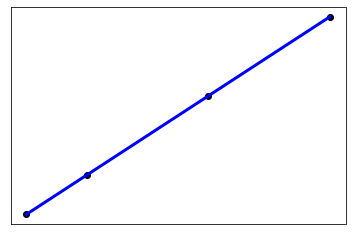

In [8]:
plot(regr, y_test, y_pred, X_test)

## What happens with a Stochastic Gradient Descent approach, though?

SGD can be considered more flexible than our simple linear regressor, so let's see what happens there.

In [9]:
clf = linear_model.SGDRegressor()
clf.fit(X, y)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

We've fit our regressor to the same simple dataset. What happens?

Coefficients: 
 [-5.30511806e+10]
Mean squared error: 177147746479265779023872.00
Coefficient of determination: -1921602673673391570944.00


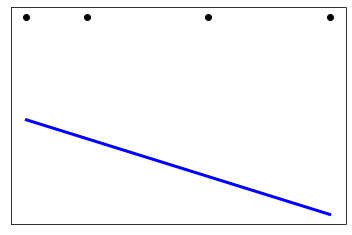

In [10]:
y_pred = clf.predict(X_test)
plot(clf, y_test, y_pred, X_test)

That plot doesn't look so good. Even more, with the default settings, the coefficient isn't even of the correct sign. The model predicts an inverse relationship, which is incorrect.

# What happens if we scale the data?

According to 

https://scikit-learn.org/stable/modules/sgd.html#sgd

, SGD is very sensitive to feature scaling. Perhaps we should scale?

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)  # Don't cheat - fit only on training data
scaled_X_train = scaler.transform(X)
scaled_X_test = scaler.transform(X_test)  # apply same transformation to test data
scaled_X_train[:5], scaled_X_test

(array([[-1.71481604],
        [-1.68017329],
        [-1.64553055],
        [-1.6108878 ],
        [-1.57624505]]), array([[-1.5416023 ],
        [-1.50695955],
        [-1.43767406],
        [-1.36838856]]))

The scaled values cover a much shorte range now, and we can try fitting a `SGDRegressor` model again.

In [12]:
clf = linear_model.SGDRegressor()
clf.fit(scaled_X_train, y)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [13]:
y_pred = clf.predict(scaled_X_test)

Coefficients: 
 [144.29278255]
Mean squared error: 0.00
Coefficient of determination: 1.00


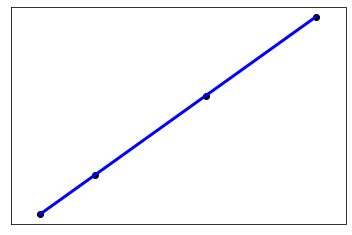

In [14]:
plot(clf, y_test, y_pred, scaled_X_test)

In [15]:
y_pred

array([25.01842946, 30.01712801, 40.01452512, 50.01192222])